<a href="https://colab.research.google.com/github/Adhipriya1/Data-Science-Projects/blob/main/Movie_Prediction_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('IMDb Movies India.csv', encoding='ISO-8859-1')

In [ ]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
df.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [ ]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [ ]:
df.shape

(15509, 10)

In [ ]:
print('The Rows of Database : ',df.shape[0])
print('The Columns of Database: ',df.shape[1])

The Rows of Database :  15509
The Columns of Database:  10


In [ ]:
df.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


<Axes: >

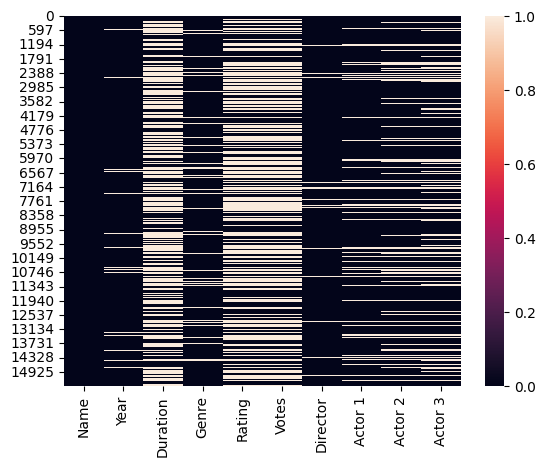

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
df.duplicated()

,0
1,False
3,False
5,False
6,False
8,False
...,...
15493,False
15494,False
15503,False
15505,False


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
#Which year there was highest average voting
df['Votes'] = df['Votes'].str.replace(',', '').astype(float)
df.groupby('Year')['Votes'].mean()

,Votes
Year,
(1931),59.000000
(1932),12.000000
(1933),12.000000
(1934),8.500000
(1935),17.800000
...,...
(2017),2460.530806
(2018),4364.594059
(2019),2676.859031


In [ ]:
df.groupby('Year')['Votes'].mean().sort_values(ascending=False)

,Votes
Year,
(2012),9900.971429
(2007),7212.017094
(2016),6780.601156
(2009),5938.805085
(2020),5819.257143
...,...
(1932),12.000000
(1933),12.000000
(1938),10.600000


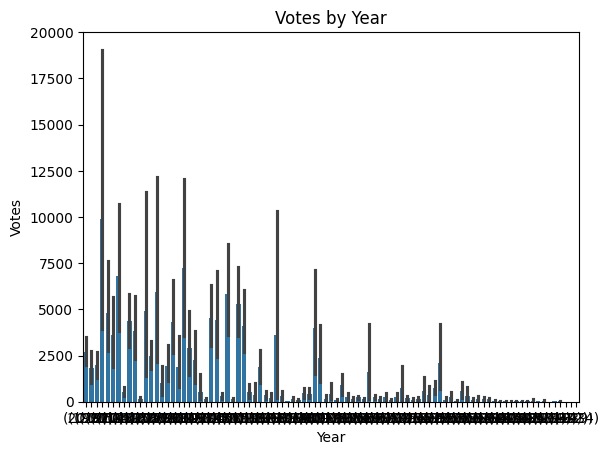

In [ ]:
sns.barplot(x='Year',y='Votes',data=df)
plt.title('Votes by Year')
plt.show()

In [ ]:
#Find Average Rating for each director
df.groupby('Director')['Rating'].mean()

,Rating
Director,
A. Bhimsingh,6.785714
A. Jagannathan,5.833333
A. Majid,5.700000
A. Muthu,3.000000
A. Salaam,5.575000
...,...
Zia Sarhadi,6.366667
Ziaullah Khan,5.600000
Zoya Akhtar,6.800000


In [ ]:
df.groupby('Director')['Rating'].mean().sort_values(ascending=False)

,Rating
Director,
Saif Ali Sayeed,10.0
Sriram Raja,9.7
Munni Pankaj,9.4
Suhrud Godbole,9.4
Arvind Pratap,9.4
...,...
Umesh Ghadge,1.9
Raajeev Walia,1.8
Stanley D'Costa,1.8


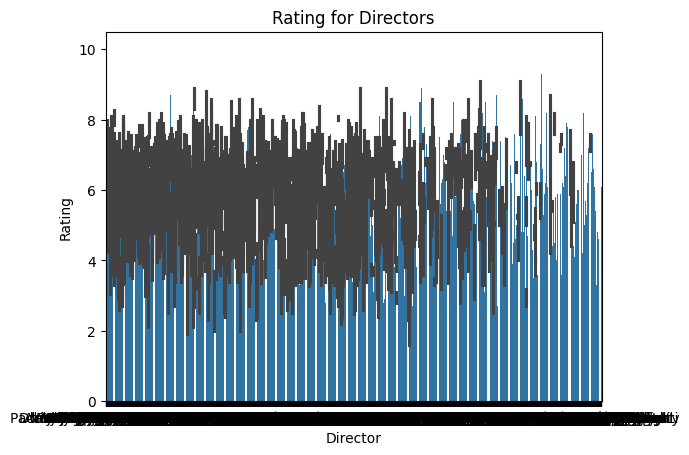

In [ ]:
sns.barplot(x='Director',y='Rating',data=df)
plt.title('Rating for Directors')
plt.show()

In [ ]:
#Number of Movies per year
df['Year'].value_counts()

,count
Year,
(2019),227
(2017),211
(2018),202
(2015),177
(2016),173
...,...
(1931),2
(1934),2
(1939),2


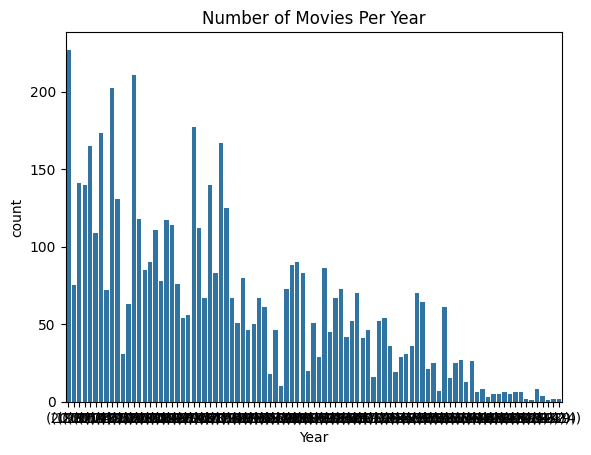

In [ ]:
sns.countplot(x='Year',data=df)
plt.title('Number of Movies Per Year')
plt.show()

In [ ]:
#Top 10 highest rated movie titles and its directors
top_10=df.nlargest(10,'Rating')[['Name','Rating','Director']]\
.set_index('Name')

In [ ]:
top_10

,Rating,Director
Name,,
Love Qubool Hai,10.0,Saif Ali Sayeed
Half Songs,9.7,Sriram Raja
Gho Gho Rani,9.4,Munni Pankaj
June,9.4,Suhrud Godbole
The Reluctant Crime,9.4,Arvind Pratap
Ashok Vatika,9.3,Rahul Mallick
Baikunth,9.3,Vishwa Bhanu
God of gods,9.3,Venkatesh Bk
Love Sorries,9.3,Gautam Joshi


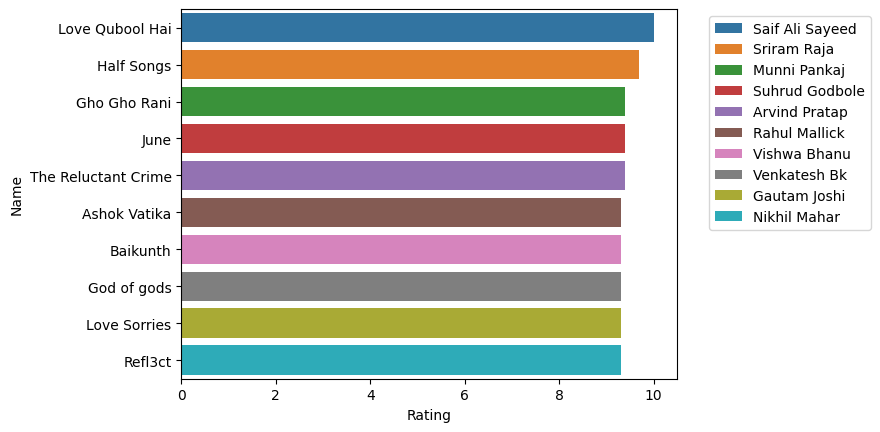

In [ ]:
sns.barplot(x='Rating',y=top_10.index,data=top_10,hue='Director',dodge=False)
plt.legend(bbox_to_anchor=(1.05,1),loc=2)

In [ ]:
# Average Rating of Movies Year wise
df.groupby('Year')['Rating'].mean().sort_values(ascending=False)

,Rating
Year,
(1952),7.212500
(1957),7.080645
(1944),7.075000
(1940),7.050000
(1953),6.955000
...,...
(1995),5.310937
(2002),5.281111
(2003),5.258772


In [ ]:
# Classify Movies Based on Ratings
def rating(rating):
  if rating>=7:
    return 'Excellent'
  elif rating>=6:
    return 'Good'
  else:
    return 'Average'

In [ ]:
df['Rating Category'] = df['Rating'].apply(rating)

In [ ]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Rating Category
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Excellent
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Average
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,Average
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,1086.0,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,Excellent
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,Average


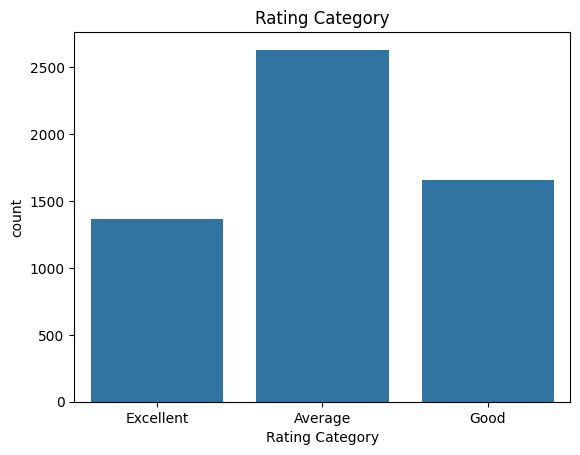

In [ ]:
sns.countplot(x='Rating Category',data=df)
plt.title('Rating Category')
plt.show()

In [ ]:
# Number of Action Movies
df['Genre'].str.contains('Action',case=False)

,Genre
1,False
3,False
5,False
6,False
8,False
...,...
15493,False
15494,False
15503,True
15505,True


In [ ]:
len(df[df['Genre'].str.contains('Action')])

1686

**MODEL TRAINING**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
X=df.drop('Rating',axis=1)
Y=df['Rating']

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
model=LogisticRegression()

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')

Mean Absolute Error (MAE): 1.1082986628061644
Mean Squared Error (MSE): 1.8069817836031192


**MODEL** **PREDICTION**

In [ ]:
model.predict(X_test)

array([5.85615551, 5.85463653, 5.85451225, ..., 5.87996207, 5.92437153,
       5.85452606])

In [ ]:
print(Y_test)

10971    6.0
14052    2.4
10002    3.8
3970     3.8
8840     7.2
        ... 
13713    6.7
2820     6.8
1810     4.8
13679    6.7
1649     6.6
Name: Rating, Length: 1132, dtype: float64
